# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Necessary Library & Variable

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
index = 265

# Read CSV File

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/soft assignment/Assignment 1/Matrix_Factorization_Assignment.csv')
df1 = df
df.head()

,Index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,11071,1.0,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,10.0,NaN,NaN,NaN,4.0,6.0,10.0,0.0,NaN,5.0,NaN,1.0,NaN,NaN,NaN,8.0,NaN,2.0,NaN,NaN,5.0,1.0,9.0,NaN,NaN,NaN,6.0,3.0,NaN,0.0,...,1.0,7.0,10.0,NaN,NaN,4.0,5.0,NaN,7.0,6.0,7.0,10.0,8.0,7.0,NaN,NaN,1.0,9.0,NaN,NaN,9.0,NaN,NaN,7.0,1.0,9.0,10.0,1.0,1.0,NaN,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,19900,NaN,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,NaN,0.0,8.0,NaN,8.0,NaN,5.0,2.0,NaN,2.0,7.0,NaN,8.0,2.0,3.0,6.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,9.0,6.0,NaN,9.0,NaN,...,9.0,NaN,9.0,NaN,NaN,NaN,6.0,0.0,0.0,7.0,0.0,8.0,10.0,0.0,NaN,2.0,0.0,NaN,NaN,8.0,NaN,NaN,NaN,7.0,9.0,6.0,NaN,NaN,7.0,6.0,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,25325,5.0,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,10.0,7.0,NaN,NaN,0.0,9.0,4.0,4.0,3.0,NaN,1.0,0.0,NaN,4.0,1.0,NaN,NaN,9.0,7.0,NaN,6.0,NaN,6.0,1.0,NaN,6.0,6.0,NaN,0.0,NaN,...,NaN,6.0,2.0,10.0,NaN,NaN,9.0,NaN,2.0,2.0,NaN,9.0,NaN,NaN,1.0,NaN,9.0,2.0,9.0,1.0,NaN,NaN,2.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,31006,3.0,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,0.0,NaN,NaN,4.0,1.0,5.0,NaN,3.0,5.0,4.0,3.0,5.0,8.0,7.0,NaN,10.0,6.0,8.0,5.0,NaN,8.0,NaN,4.0,NaN,NaN,7.0,3.0,NaN,NaN,NaN,...,10.0,8.0,0.0,NaN,9.0,NaN,NaN,NaN,2.0,2.0,5.0,NaN,NaN,2.0,7.0,NaN,2.0,NaN,2.0,1.0,4.0,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,6.0,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,37002,2.0,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,0.0,6.0,NaN,10.0,NaN,NaN,2.0,NaN,8.0,6.0,NaN,NaN,NaN,NaN,10.0,10.0,NaN,NaN,7.0,3.0,6.0,1.0,NaN,1.0,NaN,5.0,NaN,4.0,NaN,6.0,...,NaN,0.0,1.0,1.0,10.0,NaN,10.0,NaN,1.0,2.0,10.0,2.0,6.0,9.0,NaN,NaN,NaN,8.0,10.0,NaN,NaN,5.0,8.0,NaN,NaN,6.0,NaN,8.0,10.0,0.0,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN


# Shape Of Dataset

In [4]:
df.shape

(45000, 5001)

# Dataset Creation

## Row Remove

In [5]:
df = df[df.Index % index != 0]

## Column Remove

In [6]:
columns = np.arange(0,df.shape[1],index)
columns = [str(x) for x in columns]
df = df.drop(columns=columns)

## Index Column Set

In [7]:
df = df.set_index('Index')
df1 = df

# Fill the Nan Value

In [8]:
df = df.fillna(0)

# Shape of Dataset After Creation

In [9]:
df.shape

(44837, 4981)

# Validation Dataset Create

In [10]:
train, test = train_test_split(df, test_size=0.1, random_state=42)
train, val = train_test_split(train, test_size=0.1, random_state=42)
print('Train Dataset Length:'+str(len(train)))
print('Test Dataset Length:'+str(len(test)))
print('Validation Dataset Length:'+str(len(val)))

Train Dataset Length:36317
Test Dataset Length:4484
Validation Dataset Length:4036


In [11]:
train.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
43975,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,6.0,0.0,0.0,1.0,6.0,5.0,6.0,2.0,6.0,7.0,6.0,9.0,3.0,9.0,7.0,5.0,0.0,0.0,2.0,6.0,0.0,1.0,2.0,0.0,0.0,5.0,2.0,5.0,2.0,...,4.0,0.0,7.0,5.0,8.0,8.0,1.0,5.0,7.0,4.0,4.0,1.0,0.0,6.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,9.0,4.0,2.0,0.0,0.0,0.0,2.0,10.0,0.0,3.0,7.0,0.0,0.0,0.0
23590,7.0,0.0,0.0,0.0,4.0,0.0,7.0,5.0,4.0,6.0,9.0,0.0,0.0,9.0,1.0,8.0,0.0,6.0,1.0,10.0,9.0,0.0,5.0,2.0,4.0,3.0,0.0,5.0,0.0,7.0,0.0,3.0,2.0,0.0,2.0,0.0,0.0,2.0,7.0,1.0,...,2.0,0.0,0.0,2.0,8.0,8.0,0.0,2.0,5.0,7.0,0.0,0.0,9.0,0.0,2.0,0.0,0.0,6.0,0.0,10.0,0.0,7.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0
23693,4.0,6.0,3.0,9.0,0.0,10.0,0.0,0.0,0.0,10.0,6.0,0.0,0.0,2.0,8.0,0.0,5.0,2.0,7.0,0.0,3.0,6.0,0.0,1.0,4.0,0.0,0.0,4.0,7.0,0.0,9.0,0.0,0.0,10.0,8.0,7.0,4.0,5.0,9.0,0.0,...,0.0,7.0,10.0,0.0,0.0,0.0,10.0,1.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,0.0,0.0,6.0,0.0,0.0,0.0,6.0,8.0,10.0,5.0,5.0,7.0,0.0,2.0,9.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0
32199,7.0,0.0,0.0,10.0,2.0,6.0,5.0,5.0,0.0,1.0,3.0,0.0,4.0,8.0,0.0,0.0,5.0,8.0,5.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,7.0,0.0,0.0,2.0,0.0,0.0,0.0,7.0,0.0,8.0,0.0,9.0,...,3.0,6.0,2.0,10.0,9.0,0.0,5.0,1.0,0.0,0.0,0.0,7.0,10.0,4.0,0.0,10.0,0.0,0.0,0.0,10.0,1.0,7.0,2.0,9.0,3.0,4.0,10.0,10.0,5.0,9.0,0.0,4.0,10.0,4.0,0.0,0.0,7.0,0.0,3.0,9.0
249,8.0,0.0,0.0,0.0,10.0,8.0,2.0,0.0,0.0,0.0,3.0,6.0,9.0,0.0,3.0,0.0,0.0,8.0,7.0,0.0,2.0,0.0,3.0,10.0,8.0,4.0,5.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,2.0,5.0,8.0,0.0,9.0,5.0,0.0,0.0,1.0,5.0,10.0,8.0,0.0,10.0,9.0,6.0,2.0,0.0,10.0,0.0,8.0,0.0,8.0,9.0,6.0,5.0,7.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0


In [12]:
test.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1912,4.0,0.0,0.0,0.0,5.0,9.0,5.0,7.0,9.0,0.0,1.0,7.0,1.0,8.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,3.0,0.0,0.0,2.0,4.0,2.0,2.0,6.0,0.0,3.0,0.0,0.0,9.0,0.0,0.0,7.0,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,9.0,2.0,7.0,0.0,0.0,8.0,6.0,8.0,1.0,0.0,0.0,6.0,5.0,3.0,3.0,6.0,2.0,0.0,0.0,5.0,5.0,0.0,0.0,5.0,0.0,4.0,8.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
5628,3.0,7.0,0.0,6.0,6.0,2.0,4.0,8.0,0.0,9.0,3.0,6.0,0.0,0.0,1.0,5.0,0.0,0.0,5.0,6.0,1.0,0.0,10.0,0.0,9.0,0.0,4.0,1.0,0.0,9.0,1.0,8.0,0.0,7.0,3.0,0.0,9.0,5.0,0.0,3.0,...,0.0,5.0,0.0,0.0,3.0,3.0,0.0,6.0,3.0,2.0,0.0,0.0,6.0,2.0,7.0,0.0,10.0,7.0,6.0,2.0,0.0,7.0,0.0,0.0,10.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,0.0,2.0,0.0
14556,0.0,5.0,8.0,9.0,6.0,2.0,0.0,2.0,4.0,0.0,5.0,0.0,8.0,7.0,4.0,10.0,10.0,0.0,10.0,9.0,8.0,4.0,10.0,0.0,0.0,0.0,0.0,6.0,8.0,6.0,0.0,9.0,0.0,8.0,0.0,0.0,3.0,8.0,7.0,5.0,...,0.0,0.0,0.0,0.0,2.0,2.0,8.0,9.0,5.0,0.0,0.0,0.0,0.0,1.0,8.0,4.0,1.0,4.0,1.0,0.0,9.0,0.0,0.0,2.0,1.0,5.0,9.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,7.0,0.0
11451,5.0,2.0,0.0,9.0,0.0,4.0,0.0,8.0,8.0,0.0,0.0,3.0,5.0,0.0,5.0,5.0,7.0,9.0,0.0,7.0,8.0,3.0,7.0,0.0,5.0,8.0,0.0,0.0,0.0,7.0,2.0,8.0,7.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,...,8.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,8.0,10.0,0.0,9.0,0.0,0.0,10.0,10.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,6.0,5.0,0.0,9.0,3.0,8.0,0.0,0.0,9.0,0.0,0.0,5.0,6.0,0.0,4.0,5.0
15061,1.0,0.0,3.0,1.0,0.0,7.0,3.0,4.0,0.0,3.0,0.0,0.0,1.0,8.0,6.0,0.0,6.0,0.0,0.0,10.0,1.0,7.0,6.0,0.0,4.0,4.0,2.0,3.0,10.0,0.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,8.0,10.0,0.0,0.0,0.0,8.0,6.0,6.0,9.0,0.0,9.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0,0.0,0.0,2.0,5.0,6.0,0.0,7.0,3.0,0.0,0.0,7.0,3.0,0.0,5.0,0.0,6.0


In [13]:
val.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
47369,0.0,0.0,3.0,9.0,2.0,0.0,0.0,9.0,0.0,6.0,0.0,0.0,0.0,10.0,0.0,5.0,1.0,8.0,3.0,0.0,6.0,7.0,7.0,10.0,6.0,0.0,0.0,5.0,0.0,6.0,3.0,0.0,0.0,0.0,8.0,4.0,1.0,6.0,1.0,6.0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,3.0,10.0,1.0,0.0,0.0,8.0,0.0,3.0,10.0,0.0,5.0,10.0,7.0,8.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,0.0,10.0,3.0,0.0
41203,10.0,5.0,0.0,5.0,4.0,0.0,8.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,10.0,0.0,0.0,2.0,5.0,3.0,5.0,10.0,0.0,6.0,0.0,0.0,2.0,3.0,2.0,0.0,9.0,0.0,0.0,8.0,6.0,5.0,3.0,5.0,8.0,0.0,...,7.0,4.0,1.0,0.0,0.0,8.0,10.0,0.0,5.0,3.0,10.0,0.0,8.0,0.0,9.0,9.0,6.0,2.0,0.0,5.0,0.0,0.0,8.0,1.0,0.0,9.0,0.0,6.0,3.0,0.0,0.0,2.0,0.0,10.0,7.0,0.0,4.0,0.0,0.0,0.0
14981,0.0,4.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,2.0,0.0,4.0,1.0,1.0,3.0,2.0,0.0,0.0,2.0,9.0,0.0,1.0,0.0,2.0,10.0,9.0,0.0,8.0,0.0,0.0,8.0,0.0,8.0,1.0,7.0,2.0,1.0,...,7.0,0.0,0.0,10.0,1.0,6.0,6.0,4.0,0.0,1.0,5.0,6.0,8.0,9.0,0.0,1.0,8.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,7.0,9.0,0.0,8.0,9.0
27075,9.0,9.0,0.0,9.0,2.0,2.0,3.0,8.0,5.0,0.0,7.0,10.0,8.0,0.0,9.0,6.0,6.0,8.0,9.0,6.0,10.0,0.0,6.0,9.0,1.0,2.0,3.0,3.0,0.0,0.0,6.0,8.0,0.0,6.0,0.0,2.0,0.0,3.0,0.0,10.0,...,0.0,3.0,0.0,0.0,9.0,0.0,10.0,0.0,0.0,0.0,0.0,10.0,7.0,0.0,8.0,0.0,0.0,4.0,4.0,0.0,0.0,8.0,0.0,0.0,6.0,0.0,7.0,1.0,2.0,0.0,8.0,4.0,0.0,1.0,0.0,0.0,0.0,7.0,6.0,0.0
37602,9.0,5.0,0.0,8.0,10.0,0.0,0.0,8.0,5.0,10.0,10.0,0.0,0.0,0.0,1.0,9.0,2.0,5.0,10.0,7.0,6.0,3.0,2.0,0.0,0.0,3.0,8.0,6.0,2.0,10.0,10.0,7.0,0.0,0.0,10.0,4.0,0.0,10.0,9.0,5.0,...,1.0,3.0,9.0,0.0,7.0,2.0,0.0,7.0,8.0,1.0,7.0,0.0,10.0,9.0,0.0,10.0,1.0,8.0,0.0,0.0,0.0,0.0,8.0,4.0,0.0,10.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,10.0,1.0


# Row and Column List Create

In [14]:
columns = list(train.columns.values)
rows = list(train.index.values)

#Matrix Factorization

In [15]:
def matrixFactorization(K, steps):
  minimumMse = 0
  loss = []
  iteration = []
  for i in range(steps):
    N, M = train.shape
    U = np.random.rand(N,K)
    norm = np.linalg.norm(U)
    U = U/norm
    lu = (0.00015 + 0.0001 * (index % 8))
    lv = (0.00025 - 0.0001 * (index % 7))
    I = np.identity(K)
    V = np.dot(np.linalg.inv(np.dot(U.transpose(),U)+lv*I),(np.dot(train.transpose(),U)).transpose())
    U = np.dot(np.linalg.inv(np.dot(V,V.transpose())+lu*I),(np.dot(train,V.transpose())).transpose())
    mse = mean_squared_error(train, np.dot(U.transpose(),V))
    iteration.append(i)
    loss.append(mse)
    if minimumMse >= mse:
      break
    minimumMse = mse
  return U.transpose(), V, loss, iteration

In [16]:
U, V, loss, iteration = matrixFactorization(K=4000, steps=1000)

# Lost Curve Generate

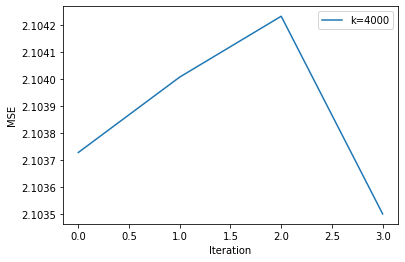

In [17]:
plt.plot(iteration,loss, label='k=4000')
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.legend()
plt.show()

# Cosine Similarity of User

In [18]:
print(cosine_similarity(U.transpose()))

[[ 1.          0.04774683  0.055516   ... -0.03697225  0.01340433
  -0.0136017 ]
 [ 0.04774683  1.         -0.01670188 ...  0.01196232  0.03751715
  -0.03624181]
 [ 0.055516   -0.01670188  1.         ...  0.04838435  0.00903
   0.02283306]
 ...
 [-0.03697225  0.01196232  0.04838435 ...  1.         -0.03592441
   0.02269226]
 [ 0.01340433  0.03751715  0.00903    ... -0.03592441  1.
  -0.07038378]
 [-0.0136017  -0.03624181  0.02283306 ...  0.02269226 -0.07038378
   1.        ]]


# Cosine Similarity of Movies

In [19]:
print(cosine_similarity(V))

[[ 1.         -0.02040113  0.01445853 ...  0.00341112  0.01557173
  -0.01068909]
 [-0.02040113  1.          0.0206828  ...  0.00775596  0.02758272
   0.0115865 ]
 [ 0.01445853  0.0206828   1.         ...  0.00286541  0.00668909
  -0.00178712]
 ...
 [ 0.00341112  0.00775596  0.00286541 ...  1.         -0.00182254
   0.01531192]
 [ 0.01557173  0.02758272  0.00668909 ... -0.00182254  1.
   0.03725987]
 [-0.01068909  0.0115865  -0.00178712 ...  0.01531192  0.03725987
   1.        ]]


# Prediction Matrix Generate

In [20]:
prediction = np.matmul(U, V)
prediction = pd.DataFrame(np.round(prediction,4),columns=columns, index=rows)
prediction.shape

(36317, 4981)

In [21]:
prediction

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
43975,3.2422,-1.3215,3.8931,0.7614,1.1501,2.0994,2.0036,-1.0127,3.4753,2.2276,4.1750,6.1915,0.0965,-2.8664,4.5115,6.5193,6.7255,3.3471,2.5669,4.6578,7.1595,5.3061,7.4619,3.0774,6.0194,5.8908,4.3749,-0.0456,1.7972,3.1575,5.4994,0.8376,0.0258,4.8027,-2.3902,-1.8376,5.7722,5.8711,4.4029,1.9154,...,6.0808,1.1452,5.9972,4.3621,4.6121,8.8852,2.1565,3.2778,5.0988,5.4396,3.8446,1.9278,0.4369,7.0861,3.4126,5.2110,2.5637,0.4260,-1.7153,0.3670,1.1483,2.5911,4.5374,1.7257,-0.4307,2.6565,7.6827,4.1608,4.4034,0.4905,0.6273,1.4489,1.1562,11.6930,0.9315,3.9852,8.4289,0.7604,0.8275,2.2454
23590,2.5132,2.1488,1.5450,0.1448,5.4755,3.8183,6.5507,7.0410,5.8824,4.5864,10.5664,0.1574,2.3978,8.4313,3.0711,6.4458,1.3202,5.7985,0.5306,8.8285,9.1096,-2.5332,1.2858,3.3912,5.8920,4.2052,0.9868,8.1005,0.7456,10.4204,1.1408,1.7289,3.0829,1.2221,1.8335,-0.3546,0.6709,2.1142,6.9761,0.9552,...,1.1308,4.1948,0.8859,2.7834,8.4686,6.2451,-1.3464,2.3129,3.5448,7.0252,2.5694,1.1092,8.1804,2.0834,2.6763,-1.5494,0.9213,7.0856,0.9529,8.1181,-0.8284,7.0570,3.4923,7.5539,1.3063,1.0048,-1.7110,-2.2703,0.3552,-0.3693,-0.6157,2.8028,0.3312,0.2637,0.8260,0.5013,-0.8595,-0.8433,7.9689,0.9014
23693,4.2850,4.3994,5.1342,8.6289,1.4101,8.6216,1.7257,0.8245,1.6065,9.1388,5.6160,0.3276,-1.1760,1.0698,6.1791,0.1046,2.1847,3.9681,6.6222,0.3839,4.1271,5.4481,0.8946,0.9977,4.0118,-1.5809,0.9957,2.1465,7.2087,4.1844,5.5312,-1.5018,0.9220,9.5180,8.9748,5.9024,1.4575,3.4220,9.5723,2.5478,...,1.4570,6.4800,8.7140,0.0004,3.0640,-0.1203,8.1951,1.4031,6.6973,0.7677,0.0791,0.6206,0.6360,-1.0249,-1.1394,5.4021,6.2083,-1.1472,-0.6896,5.5379,0.1642,1.0575,1.1976,5.6133,6.6756,7.9595,6.3656,6.1520,8.1966,0.8442,-0.2272,7.1014,2.1442,0.2580,1.1052,1.3472,11.0663,8.5713,1.2321,-0.8019
32199,5.6042,0.0121,-0.1494,5.4315,-2.8932,6.9120,5.3716,5.5411,0.7086,0.6483,4.8652,-0.0074,2.3511,5.5766,0.8541,-0.0866,4.6595,7.3621,4.2880,2.4661,4.9229,2.1223,0.1741,0.4745,0.1086,2.6666,-0.5306,1.2234,5.0450,0.2484,0.5748,2.0119,2.2161,-1.1876,-0.7151,6.5231,0.0318,7.2609,-1.8801,8.1406,...,5.0735,5.7068,3.7073,11.0304,8.0048,0.2911,3.6778,1.1947,2.4645,1.3022,1.1858,5.3941,8.5825,2.7102,0.4704,9.5083,-1.2019,1.4388,0.0176,7.3629,3.0013,5.7940,3.4641,7.5546,0.7273,3.2787,7.6573,8.4585,4.9189,9.2441,1.0551,5.5249,8.9113,3.3955,0.4162,-0.2466,6.1032,-1.2684,2.2329,7.2607
249,6.3439,-1.6290,-1.3634,1.7668,7.9830,6.5610,3.1507,1.8101,-0.1535,1.8490,2.3419,6.2488,9.1664,0.6426,3.7221,1.1097,0.4025,5.9350,6.9597,2.6025,0.7754,2.3285,3.7883,8.5089,7.2240,3.3034,5.0991,0.9419,9.0515,-1.4679,0.4726,-0.0781,1.1151,-2.9628,-4.0810,6.5370,2.6790,0.1029,2.4383,-0.0691,...,1.0231,2.8443,-0.7811,0.2858,3.4013,4.2463,8.1789,4.0850,7.8597,5.9664,1.5721,0.3493,0.0571,3.6489,8.5114,6.1763,0.2046,9.9118,7.5240,5.6370,1.4575,3.5864,8.7343,-1.3575,6.8143,1.8937,6.1339,7.8310,6.3196,3.9836,4.3755,9.8597,1.0190,1.6185,-0.7574,0.8468,-1.4827,0.1709,5.2895,1.1406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14031,0.6801,6.4166,1.8120,5.8046,0.3674,1.2171,2.4458,8.4751,4.7471,1.9778,8.5068,2.0467,2.4759,2.0880,1.4885,5.6217,9.6778,2.4841,1.5731,2.2276,4.8666,5.9754,6.4916,5.4963,6.4379,0.2932,1.3914,-1.1381,1.8595,-0.0229,1.6252,1.6477,1.0681,1.5474,1.9821,1.3078,1.0593,3.6664,7.7802,6.4339,...,0.0950,0.1324,-1.6418,5.2596,3.3145,9.4659,1.2721,1.6510,-0.2568,4.9399,0.9218,1.4205,4.7230,0.6440,1.2103,10.5988,-0.6923,1.3597,3.1180,1.8492,6.8800,1.7155,1

# Recommendation

In [23]:
user=int(input("Enter user ID: "))
if user in rows:
  main = df1.loc[user]
  main = main[~main.notnull()]
  suggestion = prediction.loc[user]
  recommendation_index = [x for x in main.index.tolist() if x in suggestion.index.tolist()]
  print(suggestion.loc[recommendation_index].sort_values(ascending=False).head(5))
else:
  print('There is no user with user id '+str(user))

Enter user ID: 2222
2242    4.8180
1181    4.7594
4196    4.7079
3378    4.4467
3283    4.3640
Name: 2222, dtype: float64
